In [41]:
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

In [ ]:
df_ncp = pd.read_csv("/Users/zhuangbin/OneDrive/ProjectSpace/Jupyter/My Project/AI/data/战胜NCP.csv")

print(df_ncp.shape)
df_ncp.plot.scatter('x', 'y')

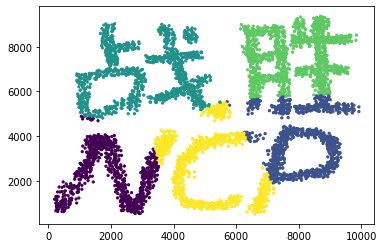

In [68]:
kmeans = KMeans(n_clusters=5,max_iter=3000)
model = kmeans.fit(df_ncp.iloc[:,1:])

plt.scatter(df_ncp['x'],df_ncp['y'],c=model.labels_,s=5)

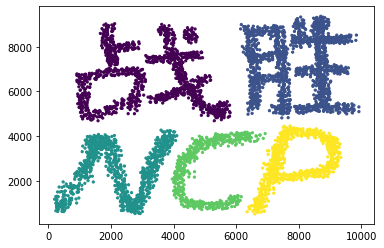

In [67]:
# DBSCAN
# 主要参数为：eps：聚类点之间的距离；min_samples：聚类的最少样本数量
dbscan = DBSCAN(eps=310, min_samples=20)
model = dbscan.fit(df_ncp.iloc[:, 1:])


plt.scatter(df_ncp['x'],df_ncp['y'],c=model.labels_,s=5)
